In [ ]:
import os.path as path
import raw_data_preprocessing as rdp
import warnings

warnings.filterwarnings('ignore')

googledrive_loc = '/datasets/googledrive'
data_folder_loc = 'Yi_UCI_research/GSR other works/2020 Summer_predict individual training/data/saved data/'
data_path = path.join(googledrive_loc, data_folder_loc)

import classification as clf
X, Y, orig_len, feature_names = clf.read_inputs(data_path,['input_x.array','input_y.array','original_len.int','feature_names.list'])
print('The input and output shape: {} and {}'.format(X.shape, Y.shape))

The input and output shape: (380, 14) and (380,)


In [ ]:
classify_test = clf.ClassificationProcessor(X,Y, orig_len, feature_names)
# classify_test.get_stacking()

model selection and feature selection

In [ ]:
# classify_test.model_selection(14)

In [ ]:
# classify_test.exhausive_feature_selection('Nearest Neighbors')
# classify_test.exhausive_feature_selection('Random Forest')
# classify_test.feature_selection('Nearest Neighbors')

final model

Nearest Neighbors Accuracy: 0.496 (0.500)
f1 score: 0.493
precision: 0.492
recall: 0.495
One-vs-Rest ROC AUC scores:
0.648421 (macro),
0.648427 (weighted by prevalence)
The cogen kappa score is : 0.2396924964629582


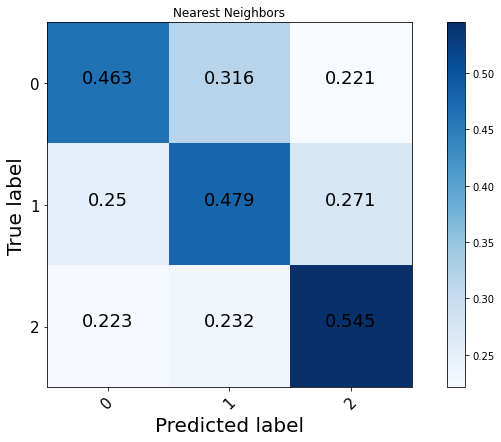

<Figure size 432x432 with 0 Axes>

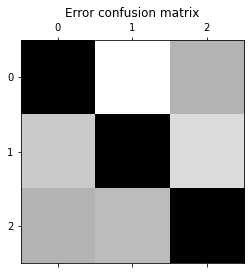

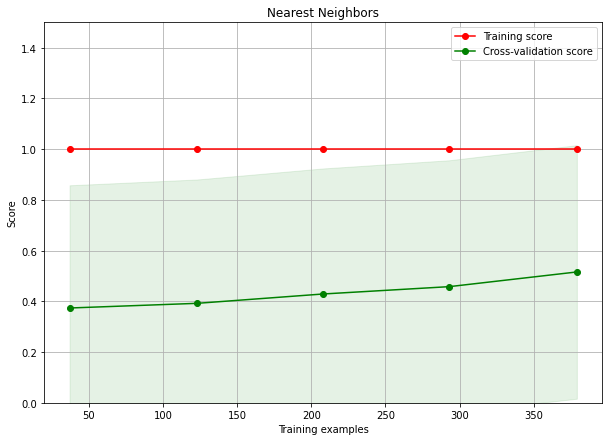

In [ ]:
final_accuracies, final_pred_y = classify_test.final_model('Nearest Neighbors', [0, 1, 4, 6, 7, 9, 10, 12, 13])

shap

In [ ]:
# classify_test.shap('Nearest Neighbors',data_path)

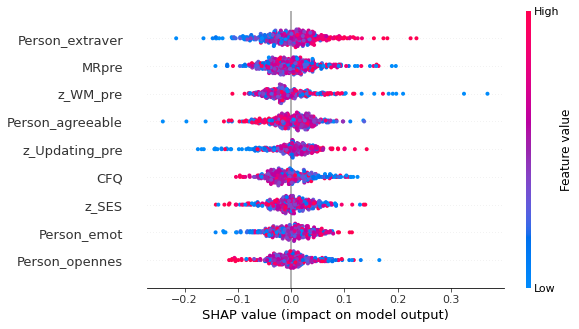

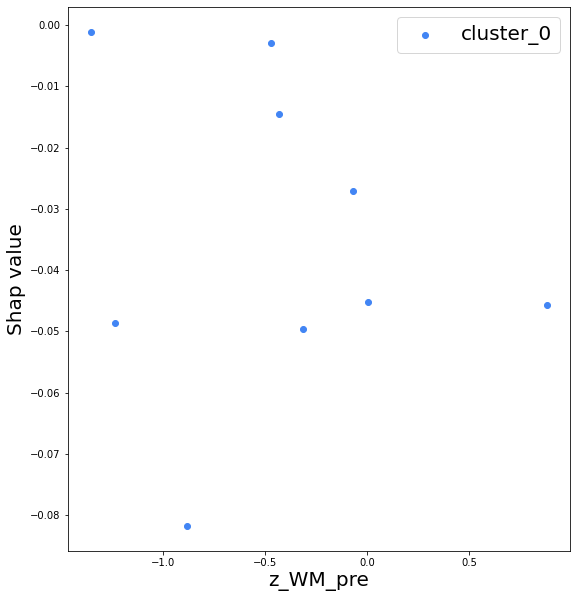

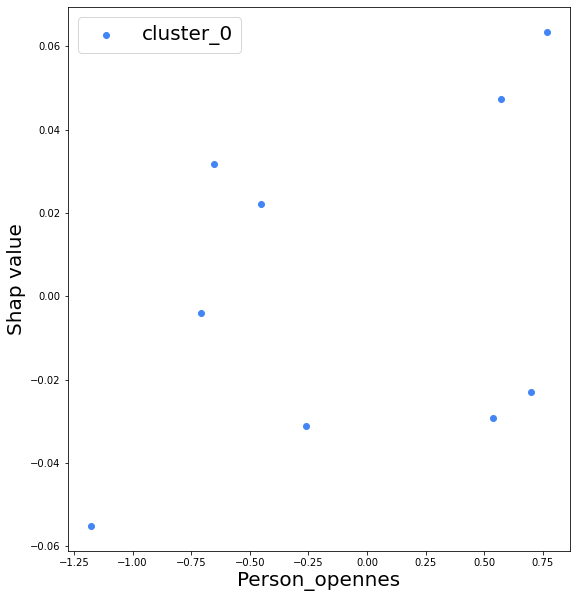

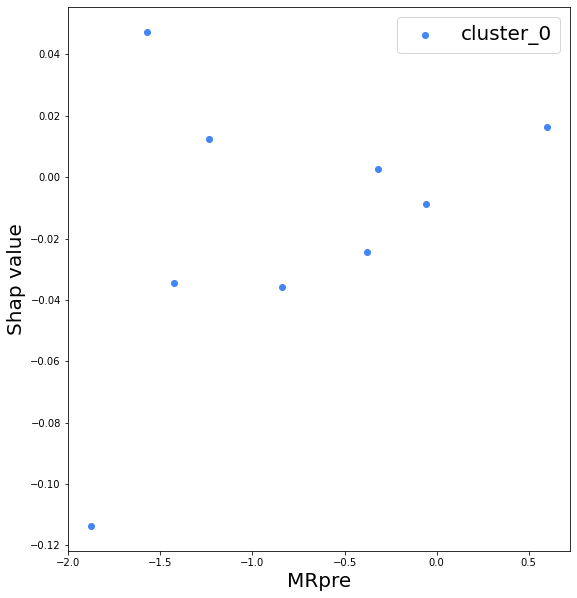

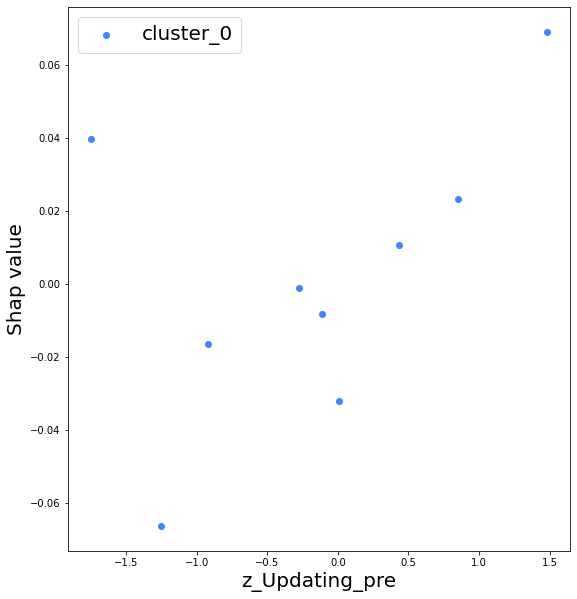

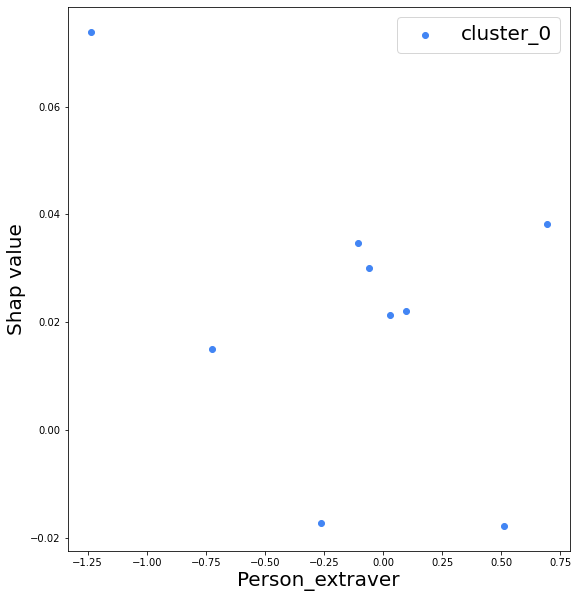

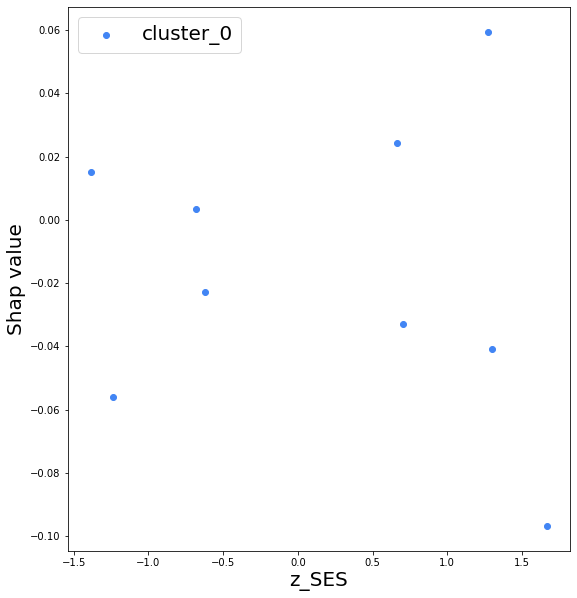

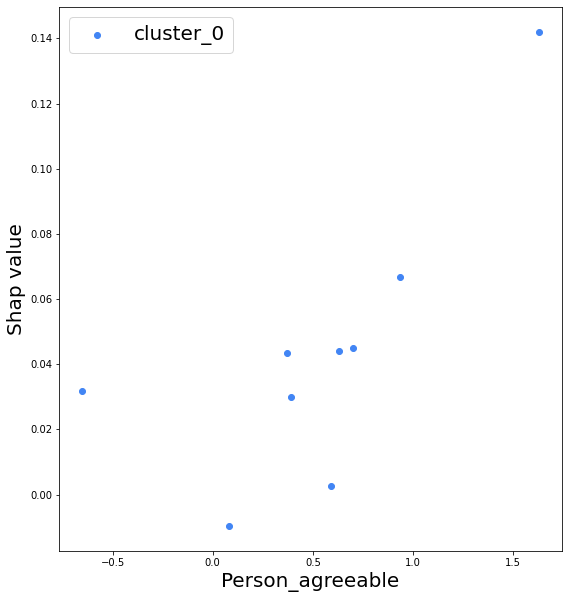

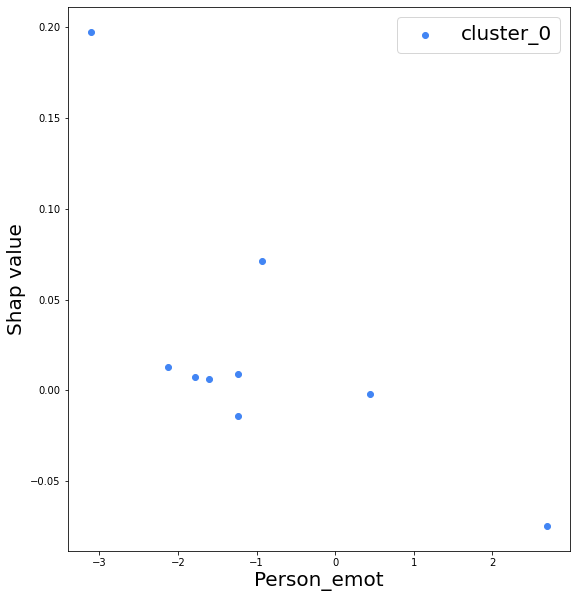

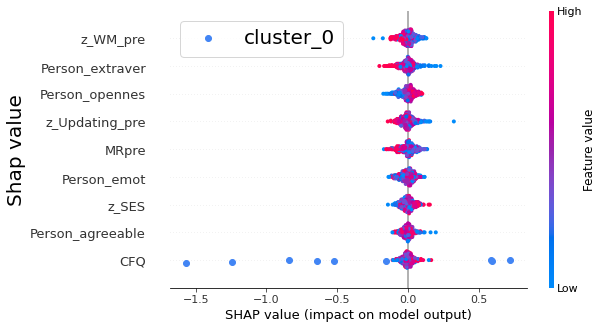

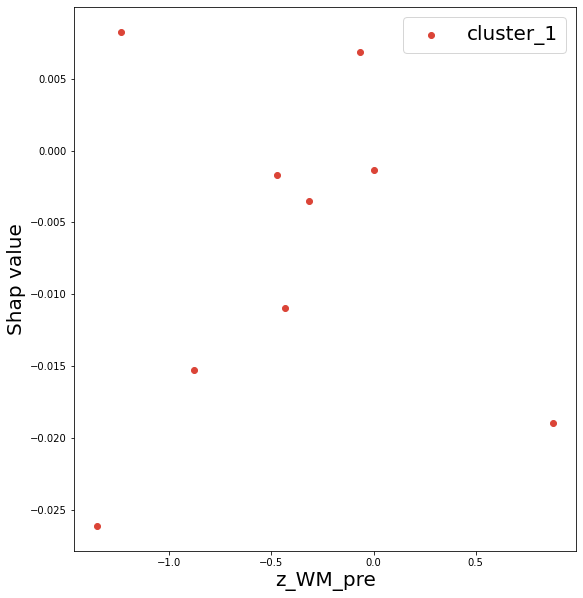

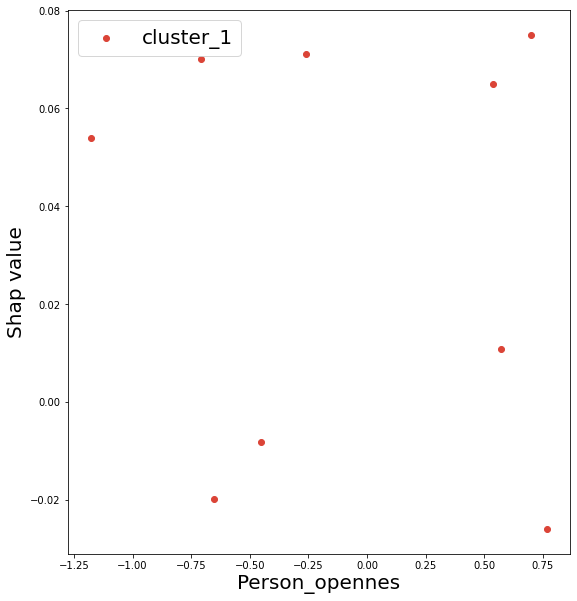

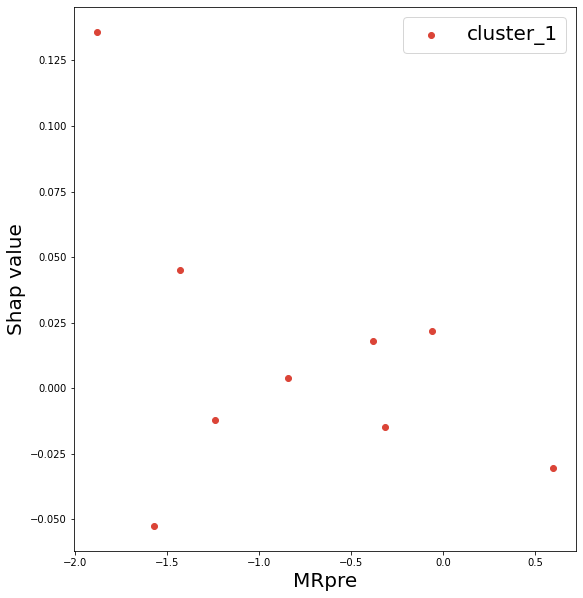

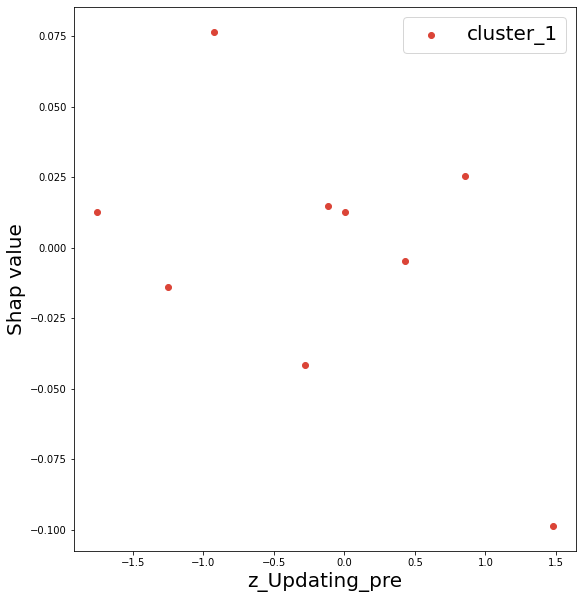

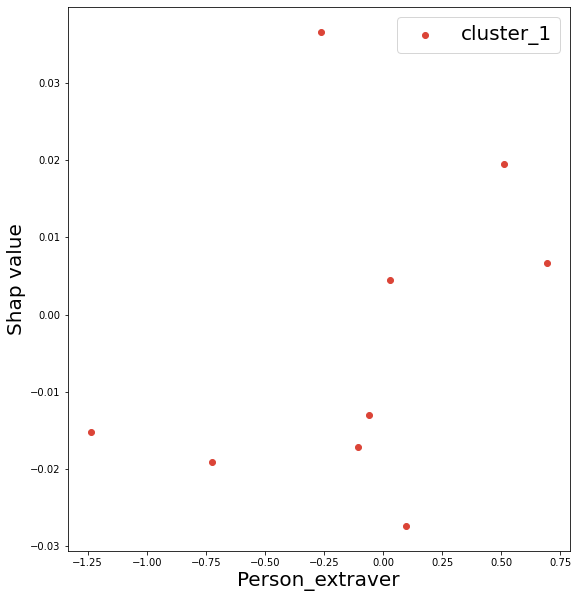

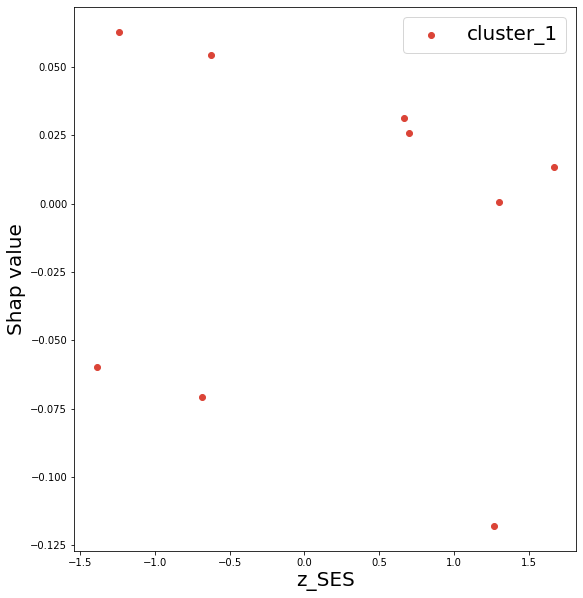

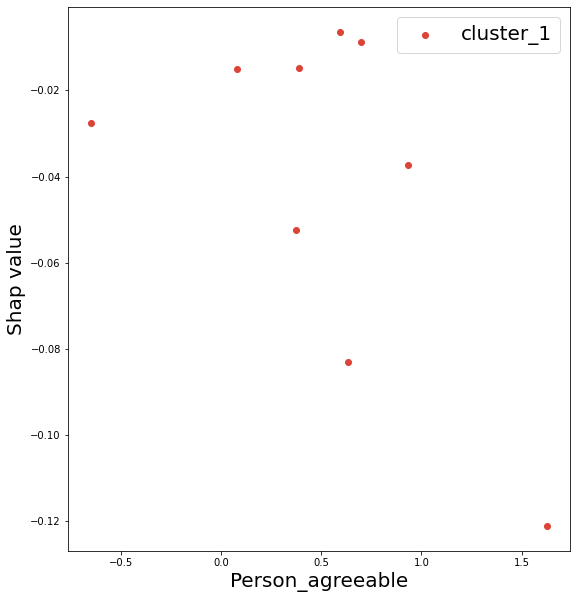

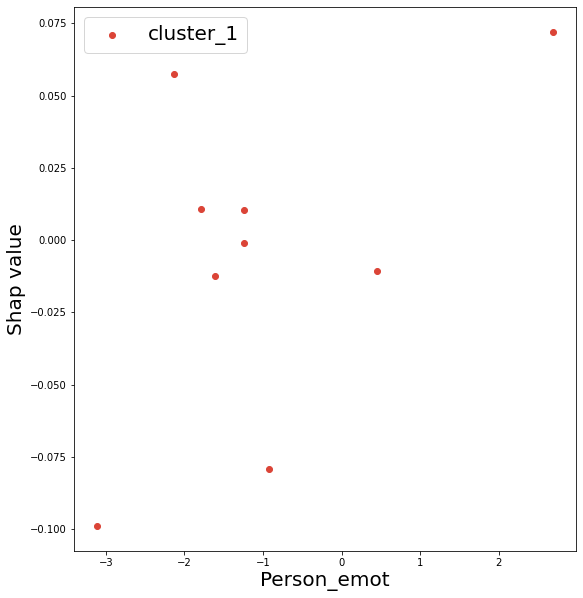

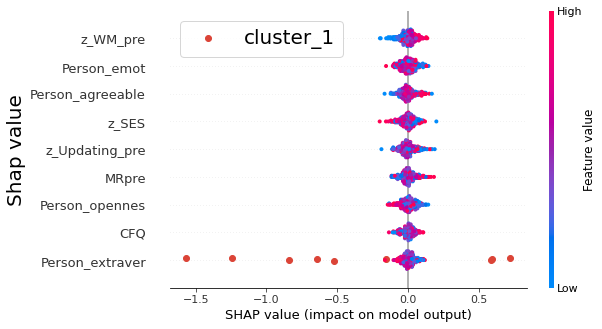

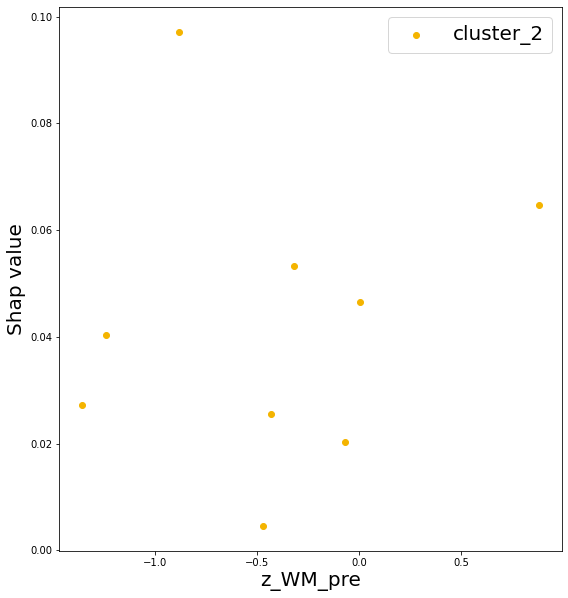

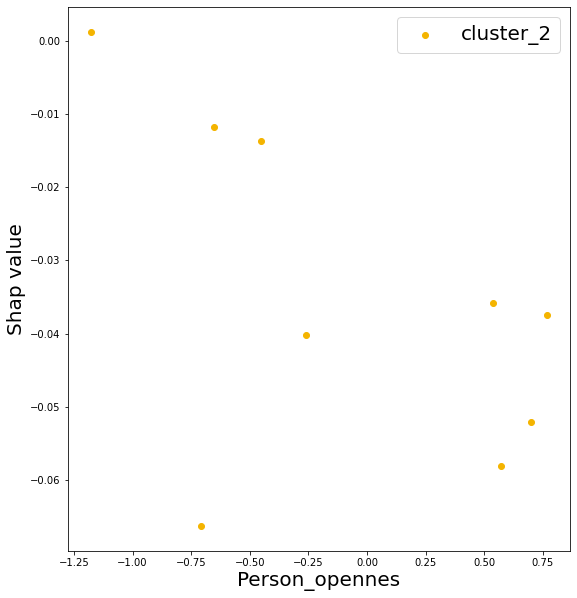

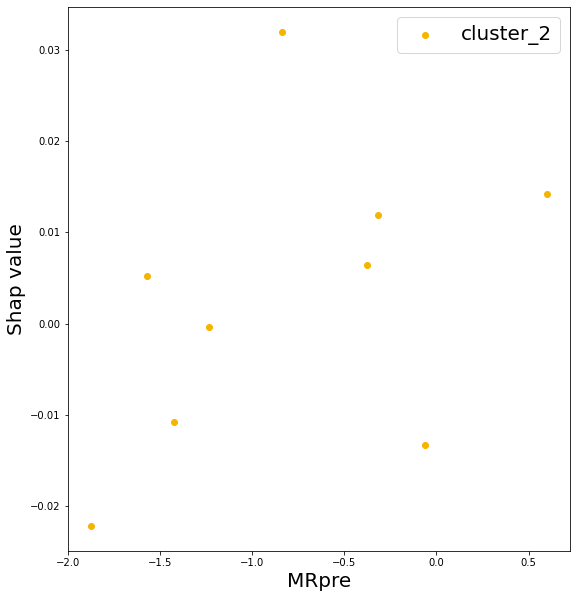

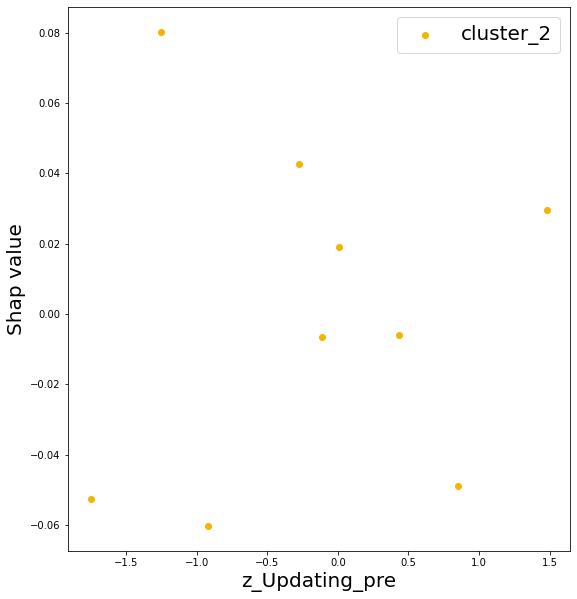

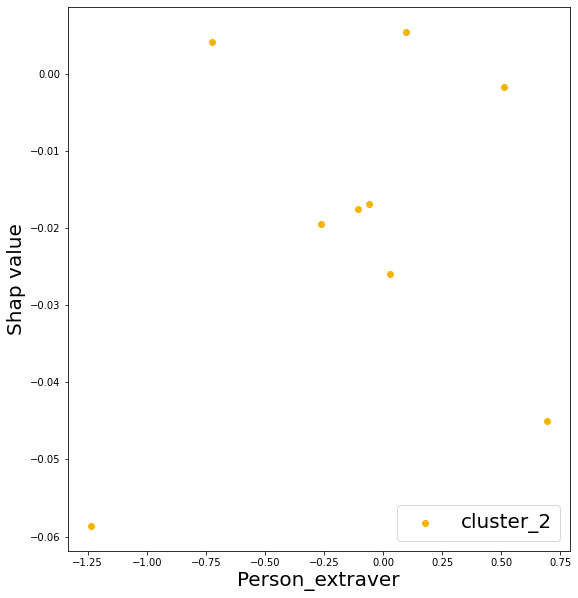

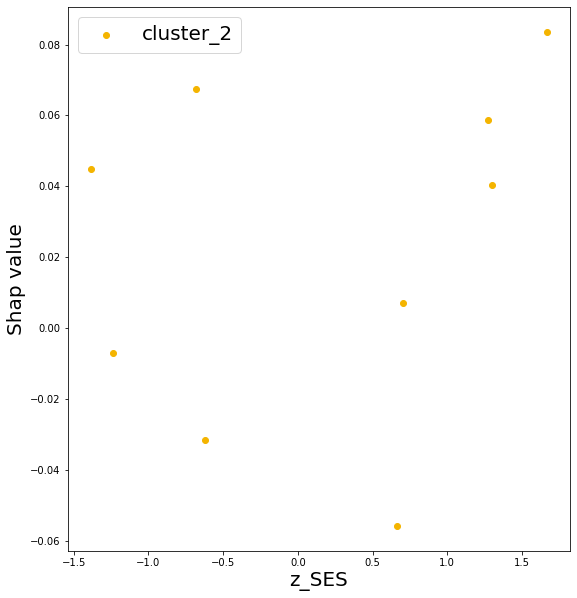

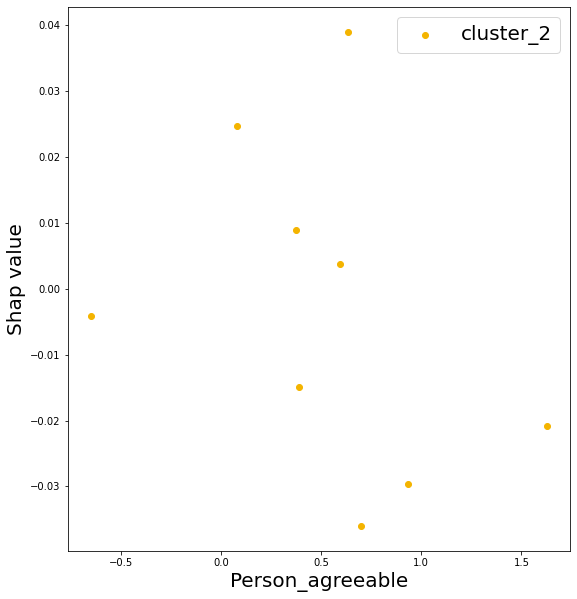

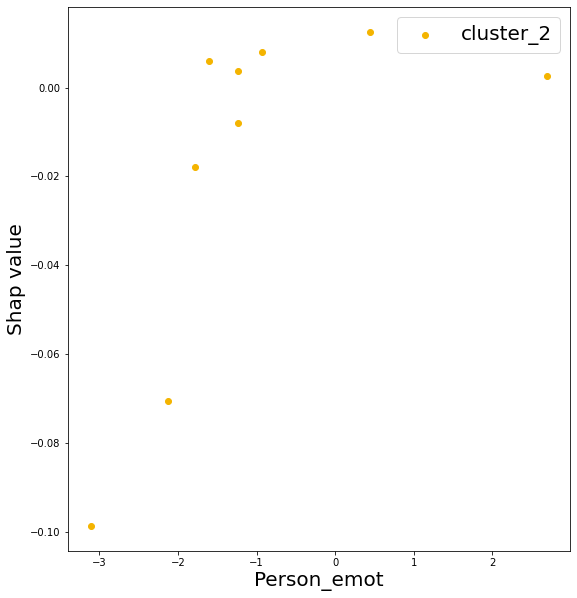

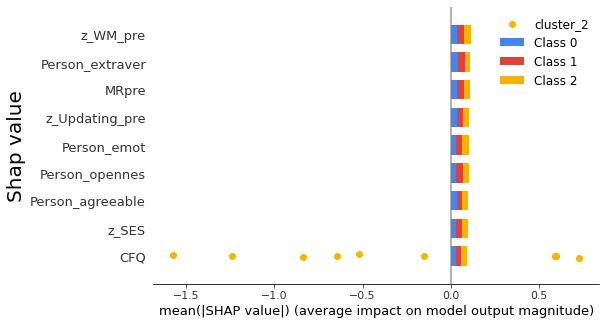

In [ ]:
shap_all, expected_shap = clf.read_inputs(data_path,['shap_values.data','shap_expected.data'])
classify_test.shap_visualize(shap_all, expected_shap, final_accuracies, final_pred_y, False)

In [ ]:
shap_class = classify_test.read_shap(shap_all, 0)

In [ ]:
shap_class[[0,1,2]][:]

array([[-0.04513387, -0.04967425, -0.04860295, -0.04574092, -0.02709896,
        -0.01458347, -0.00109714, -0.08181387, -0.00287726],
       [-0.03100052, -0.0230225 ,  0.02202622, -0.05511991,  0.06341165,
        -0.02914196, -0.00392397,  0.04729951,  0.03167656],
       [-0.02450468,  0.00278395,  0.01248828, -0.11369175,  0.01619806,
        -0.03582934, -0.00865251, -0.03431661,  0.04734685]])

In [ ]:
X[[0,1,2]][:]

array([[ 0.00398746, -0.31656706, -0.05757738,  0.24084122, -1.23758331,
         0.69992405,  0.88128121, -0.06864571, -0.91600579, -0.43222964,
        -1.35516349,  0.53471642, -0.88182587, -0.47104525],
       [-0.2614751 ,  0.70068778,  1.0872812 ,  0.9544387 , -0.45355818,
        -2.56937984, -1.17934216,  0.76823467,  0.17035055,  0.53789077,
        -0.7074029 ,  0.34389161,  0.57323659, -0.65435636],
       [-0.37854425, -0.31656706, -0.55945815, -1.21608105, -1.23758331,
         0.38856177, -1.87898413,  0.6008586 , -1.13327706, -0.83876671,
        -0.05964232,  0.1530668 , -1.4274743 , -1.5709119 ]])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6b8ead81-70bf-4d6b-bd50-8194f8f72b46' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>